# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. PDA - Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

In [9]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 121

In [10]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 200, 2 пациента < 85

In [11]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

In [12]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 400, 1 пациент < 50

In [13]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

In [14]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

In [15]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

In [16]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 10,

In [17]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

In [18]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

In [19]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 8

In [20]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 1600, 2 пациента < 3

In [21]:
df = df.query('alt < 1600 & alt > 3')

### Итого:
Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.:

In [22]:
df.shape

(13809, 26)

## 6.2 Список всех фич

Составлю список всех фичей
Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [23]:
df_copy = df.copy()
df_test_copy = df_test.copy()

In [24]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop('oral', axis=1)

In [25]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [26]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [27]:
cat_features

['tartar']

In [28]:
ввввввввввввввввв

NameError: name 'ввввввввввввввввв' is not defined

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
cat_features

### Создание Pool`ов для модели

In [ ]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score.head()

Распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [ ]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [ ]:
df.smoking.mean()

In [ ]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline.csv', index=False)

Проверка значений:

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.3117

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.25

In [ ]:
((df_test.baseline_cat_score > 0.25) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.25) * 1
submission.to_csv('Baseline_threshold0.25.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4175 ↑

#### Изменение порога

Изменю порог с 0.25 на 0.2

In [ ]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42861 ↑

#### Изменение порога

Изменю порог с 0.2 на 0.1

In [ ]:
((df_test.baseline_cat_score > 0.1) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.1) * 1
submission.to_csv('Baseline_threshold0.1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.40293 ↓

#### Изменение порога

Изменю порог с 0.1 на 0.15

In [ ]:
((df_test.baseline_cat_score > 0.15) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.15) * 1
submission.to_csv('Baseline_threshold0.15.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4259 ↑

### Итого:
Наилучший порог для Baseline ≈ 0.2, F1 = 0.4286; THRSH = 0.2, GPU, F1 = 43437

## Catboost CV

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.23138 ↓

#### Изменяю порог до 0.2

In [ ]:
((df_test.baseline_cat_cv_score > 0.2) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.2) * 1
submission.to_csv('Cat_CV_GPU_THRS02_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43165 ↑ - лучше, чем Baseline THRS 0.2; GPU = 0.43217 ↑↑

#### Изменяю порог до 0.205

In [ ]:
((df_test.baseline_cat_cv_score > 0.205) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.205) * 1
submission.to_csv('Cat_CV_THRS0205_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.4284 ↓ - хуже, чем CV THRS 0.2

#### Изменяю порог до 0.195

In [ ]:
((df_test.baseline_cat_cv_score > 0.195) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.195) * 1
submission.to_csv('Cat_CV_THRS0195_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42978 ↑ - лучше, чем Baseline THRS 0.2

### Итого:
Наилучший порог для CV ≈ 0.2, F1 = 0.43165. Хуже, чем Baseline GPU THRSH 0.2 (0.43437)

## Baseline model + ACW + GPU

### Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU'}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score.head()

Распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [ ]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [ ]:
df.smoking.mean()

In [ ]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline_ACW_GPU.csv', index=False)

Проверка значений:

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43639

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.501

In [ ]:
((df_test.baseline_cat_score > 0.501) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.501) * 1
submission.to_csv('Baseline_ACW_GPU_THRSH_0.501.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43589 ↓, 0.501-0.43776 !!! ↑ МОЖНО ДОЖИМАТЬ ↑ 0.501 < X!!!

## Catboost CV + ACW + GPU

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_ACW_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42672 ↓

#### Изменяю порог до 0.45

In [ ]:
((df_test.baseline_cat_cv_score > 0.45) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.45) * 1
submission.to_csv('Cat_CV10_GPU_THRS045_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43046

In [ ]:
dddddddddddddddddd

## Catboost + ACW + GPU + Drop features

### Список фич

In [29]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [30]:
X = df.drop(['oral', 'smoking', 'hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)
y = df.smoking
cat_features = ['tartar']
# df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop(['hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)

In [31]:
X.head()

,age,weight_kg_,waist_cm_,relaxation,fasting_blood_sugar,triglyceride,hdl,ldl,hemoglobin,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,65,75,91.0,79.0,107.0,51.0,71.0,52.0,14.0,1.2,20.0,16.0,122.0,0,N
1,35,85,97.0,88.0,117.0,239.0,46.0,120.0,14.6,0.7,20.0,25.0,40.0,0,Y
2,70,55,75.0,63.0,128.0,60.0,68.0,85.0,14.7,0.7,15.0,13.0,19.0,0,Y
3,35,85,83.0,80.0,100.0,155.0,53.0,125.0,17.2,0.8,22.0,18.0,17.0,0,Y
4,25,65,80.0,75.0,94.0,73.0,58.0,80.0,16.5,1.0,20.0,13.0,14.0,0,Y


In [32]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [33]:
cat_features

['tartar']

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Создание Pool`ов для модели

In [35]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Настройка гиперпараметров

In [ ]:
вввввввввввввввввввввввв

LR 0.01 - 0.03

In [139]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 300}

In [140]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [141]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.058056
0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 40.2ms	remaining: 40.2s
100:	learn: 0.6983700	test: 0.6161387	best: 0.6190550 (98)	total: 7.41s	remaining: 1m 5s
200:	learn: 0.7375642	test: 0.6131263	best: 0.6194675 (107)	total: 11s	remaining: 43.6s
300:	learn: 0.7570418	test: 0.6003841	best: 0.6194675 (107)	total: 14.4s	remaining: 33.4s
400:	learn: 0.7716029	test: 0.5982121	best: 0.6194675 (107)	total: 17.8s	remaining: 26.5s
bestTest = 0.6194674581
bestIteration = 107
Shrink model to first 108 iterations.
CPU times: total: 20.4 s
Wall time: 18.5 s


Lr-auto=0.058056
bestTest = 0.6194674581
bestIteration = 107
LR = 0.03
bestTest = 0.6152708489
bestIteration = 381
LR = 0.02
bestTest = 0.6127704915
bestIteration = 399
LR = 0.04
bestTest = 0.61339383
bestIteration = 369
LR = 0.01
bestTest = 0.6167331055
bestIteration = 856
LR = 0.0581
bestTest = 0.6218981807
bestIteration = 209
**BEST LR** = 0.0583
bestTest = 0.6231496187
bestIteration = 271


### Feature importance

In [142]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,16.037052
1,gtp,15.553149
2,alt,11.059059
3,triglyceride,10.394328
4,hemoglobin,6.687902
5,ldl,6.351543
6,waist_cm_,5.977403
7,fasting_blood_sugar,4.483045
8,serum_creatinine,4.227178
9,ast,4.210789


In [143]:
model.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [144]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [145]:
df_test['baseline_cat_score'] = model.predict_proba(df_test_copy)[:, 1]

In [146]:
df_test.baseline_cat_score.head()

0    0.500722
1    0.078501
2    0.437625
3    0.347356
4    0.590422
Name: baseline_cat_score, dtype: float64

Распределение вероятностей (Score) курит или не курит

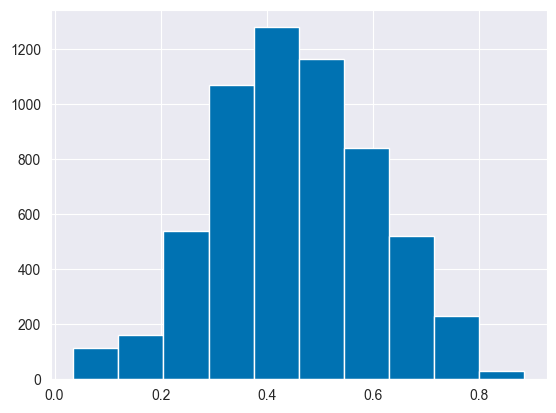

In [147]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [148]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

0.3668798384382363

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [149]:
model.predict(df_test_copy).mean()

0.3668798384382363

In [150]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [151]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.500722,1
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.078501,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.437625,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.347356,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.590422,1


### Сохранение результатов

In [152]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Cat_ACW_GPU_LR0.03_drop9F.csv', index=False)

Проверка значений:

In [153]:
submission.smoking.mean()

0.3668798384382363

In [154]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** 0.43846 ↑↑↑

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.501

In [181]:
((df_test.baseline_cat_score > 0.50103) * 1).mean()

0.36385055536856276

In [171]:
((df_test.baseline_cat_score > 0.501) * 1).mean()

0.3640188488724335

In [235]:
((df_test.baseline_cat_score > 0.4988) * 1).mean()

0.3692359474924268

#### Сохранение результатов

In [236]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.4988) * 1
submission.to_csv('Cat_ACW_GPU_drop9F_THRSH04988.csv', index=False)

In [237]:
submission.smoking.mean()

0.3692359474924268

In [214]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** 0.43889 - 0.501(36.4%), 0.43882 - 0.5012(36.33) надо пробовать меньше

## Catboost CV + ACW + GPU + Drop features

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [ ]:
best_iter, best_value

### Best iteration
Обучение на всех данных:

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'task_type': 'GPU',
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
%%time
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test_copy)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score.head()

In [ ]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.2%

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_ACW_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42672 ↓

#### Изменяю порог до 0.45

In [ ]:
((df_test.baseline_cat_cv_score > 0.45) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.45) * 1
submission.to_csv('Cat_CV_GPU_Drop9F_THRS045_LR_auto.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43046

## Grid Search

In [36]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000}

In [37]:
model = CatBoostClassifier(**parameters)

In [38]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(**parameters)
grid = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.058056, 0.07, 0.09, 0.11]}

In [39]:
%%time
result = model.grid_search(grid, pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6259845	test: 0.6162343	best: 0.6162343 (0)	total: 42.6ms	remaining: 42.6s
100:	learn: 0.6550649	test: 0.6417504	best: 0.6463828 (69)	total: 3.54s	remaining: 31.6s
200:	learn: 0.6794246	test: 0.6402141	best: 0.6507105 (147)	total: 6.96s	remaining: 27.7s
300:	learn: 0.6914074	test: 0.6431730	best: 0.6507105 (147)	total: 10.4s	remaining: 24.2s
400:	learn: 0.6981537	test: 0.6415683	best: 0.6507105 (147)	total: 13.9s	remaining: 20.7s
500:	learn: 0.7081164	test: 0.6375672	best: 0.6507105 (147)	total: 17.4s	remaining: 17.3s
600:	learn: 0.7201681	test: 0.6373807	best: 0.6507105 (147)	total: 20.7s	remaining: 13.8s
700:	learn: 0.7285397	test: 0.6355422	best: 0.6507105 (147)	total: 24.1s	remaining: 10.3s
800:	learn: 0.7348129	test: 0.6379784	best: 0.6507105 (147)	total: 27.6s	remaining: 6.86s
900:	learn: 0.7384330	test: 0.6341604	best: 0.6507105 (147)	total: 31.1s	remaining: 3.41s
999:	learn: 0.7414857	test: 0.6317190	best: 0.6507105 (147)	total: 34.5s	remaining: 0us
bestTest = 0.650

700:	learn: 0.8484322	test: 0.6170806	best: 0.6464360 (23)	total: 23.9s	remaining: 10.2s
800:	learn: 0.8625737	test: 0.6064279	best: 0.6464360 (23)	total: 27.3s	remaining: 6.79s
900:	learn: 0.8733962	test: 0.5958273	best: 0.6464360 (23)	total: 30.7s	remaining: 3.38s
999:	learn: 0.8834748	test: 0.5812656	best: 0.6464360 (23)	total: 34.1s	remaining: 0us
bestTest = 0.6464359949
bestIteration = 23
7:	loss: 0.6464360	best: 0.6559254 (2)	total: 4m 33s	remaining: 34.2s
0:	learn: 0.6259845	test: 0.6162343	best: 0.6162343 (0)	total: 34.3ms	remaining: 34.3s
100:	learn: 0.7455180	test: 0.6186470	best: 0.6386032 (14)	total: 3.43s	remaining: 30.5s
200:	learn: 0.7775528	test: 0.5972216	best: 0.6386032 (14)	total: 6.96s	remaining: 27.7s
300:	learn: 0.7982462	test: 0.6032677	best: 0.6386032 (14)	total: 10.7s	remaining: 24.8s
400:	learn: 0.8233798	test: 0.6028031	best: 0.6386032 (14)	total: 14.2s	remaining: 21.2s
500:	learn: 0.8410121	test: 0.5884716	best: 0.6386032 (14)	total: 17.7s	remaining: 17.6s
6

In [40]:
print('Best parameters: {}\n'.format(result['params']))

msg = 'Mean MAE value on validation set per each iteration:\n{}'
print(msg.format(np.round(result['cv_results']['test-MAE-mean'], 4)))

Best parameters: {'learning_rate': 0.03}

Mean MAE value on validation set per each iteration:
[]


In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7]}

In [ ]:
result = model.grid_search(grid, pool, plot=True)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100)
grid = {'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]}

In [ ]:
result = model.grid_search(grid, pool, plot=True)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 100, random_seed=659)
grid = {'learning_rate': [0.4, 0.43, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57]}

In [ ]:
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()

## Catboost model comparison

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.15,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.15',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.25,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.25',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.35,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.35',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.47,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.47',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.55,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.55',
    custom_metric=['F1', 'AUC']
)


model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.15', 'learning_rate_0.25', 'learning_rate_0.35', 'learning_rate_0.47', 'learning_rate_0.55']).start()